In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Lets load the Boston House Pricing Dataset

In [11]:
df = pd.read_csv('BostonHousing.csv')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [12]:
df.shape

(506, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Exploratory Data Analysis

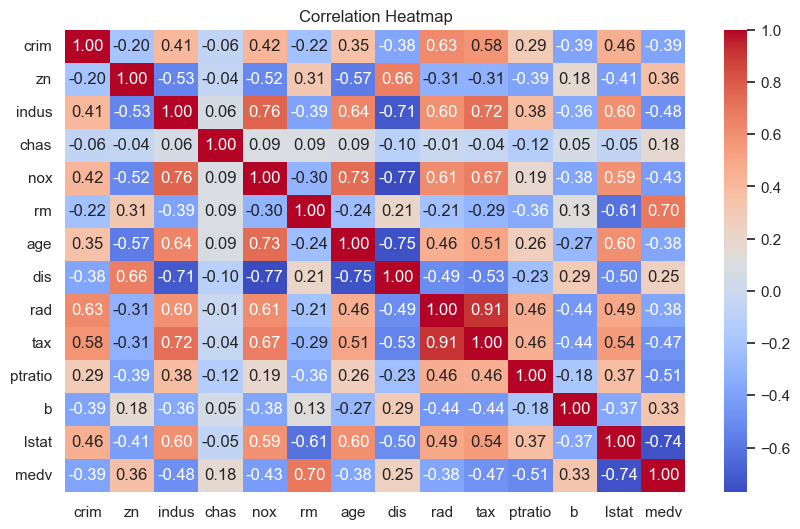

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

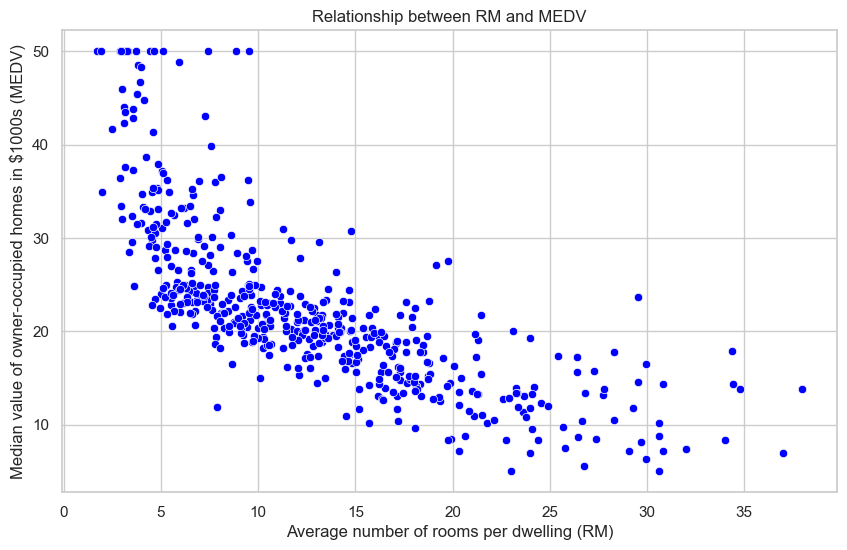

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lstat', y='medv', data=df, color='blue')
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()

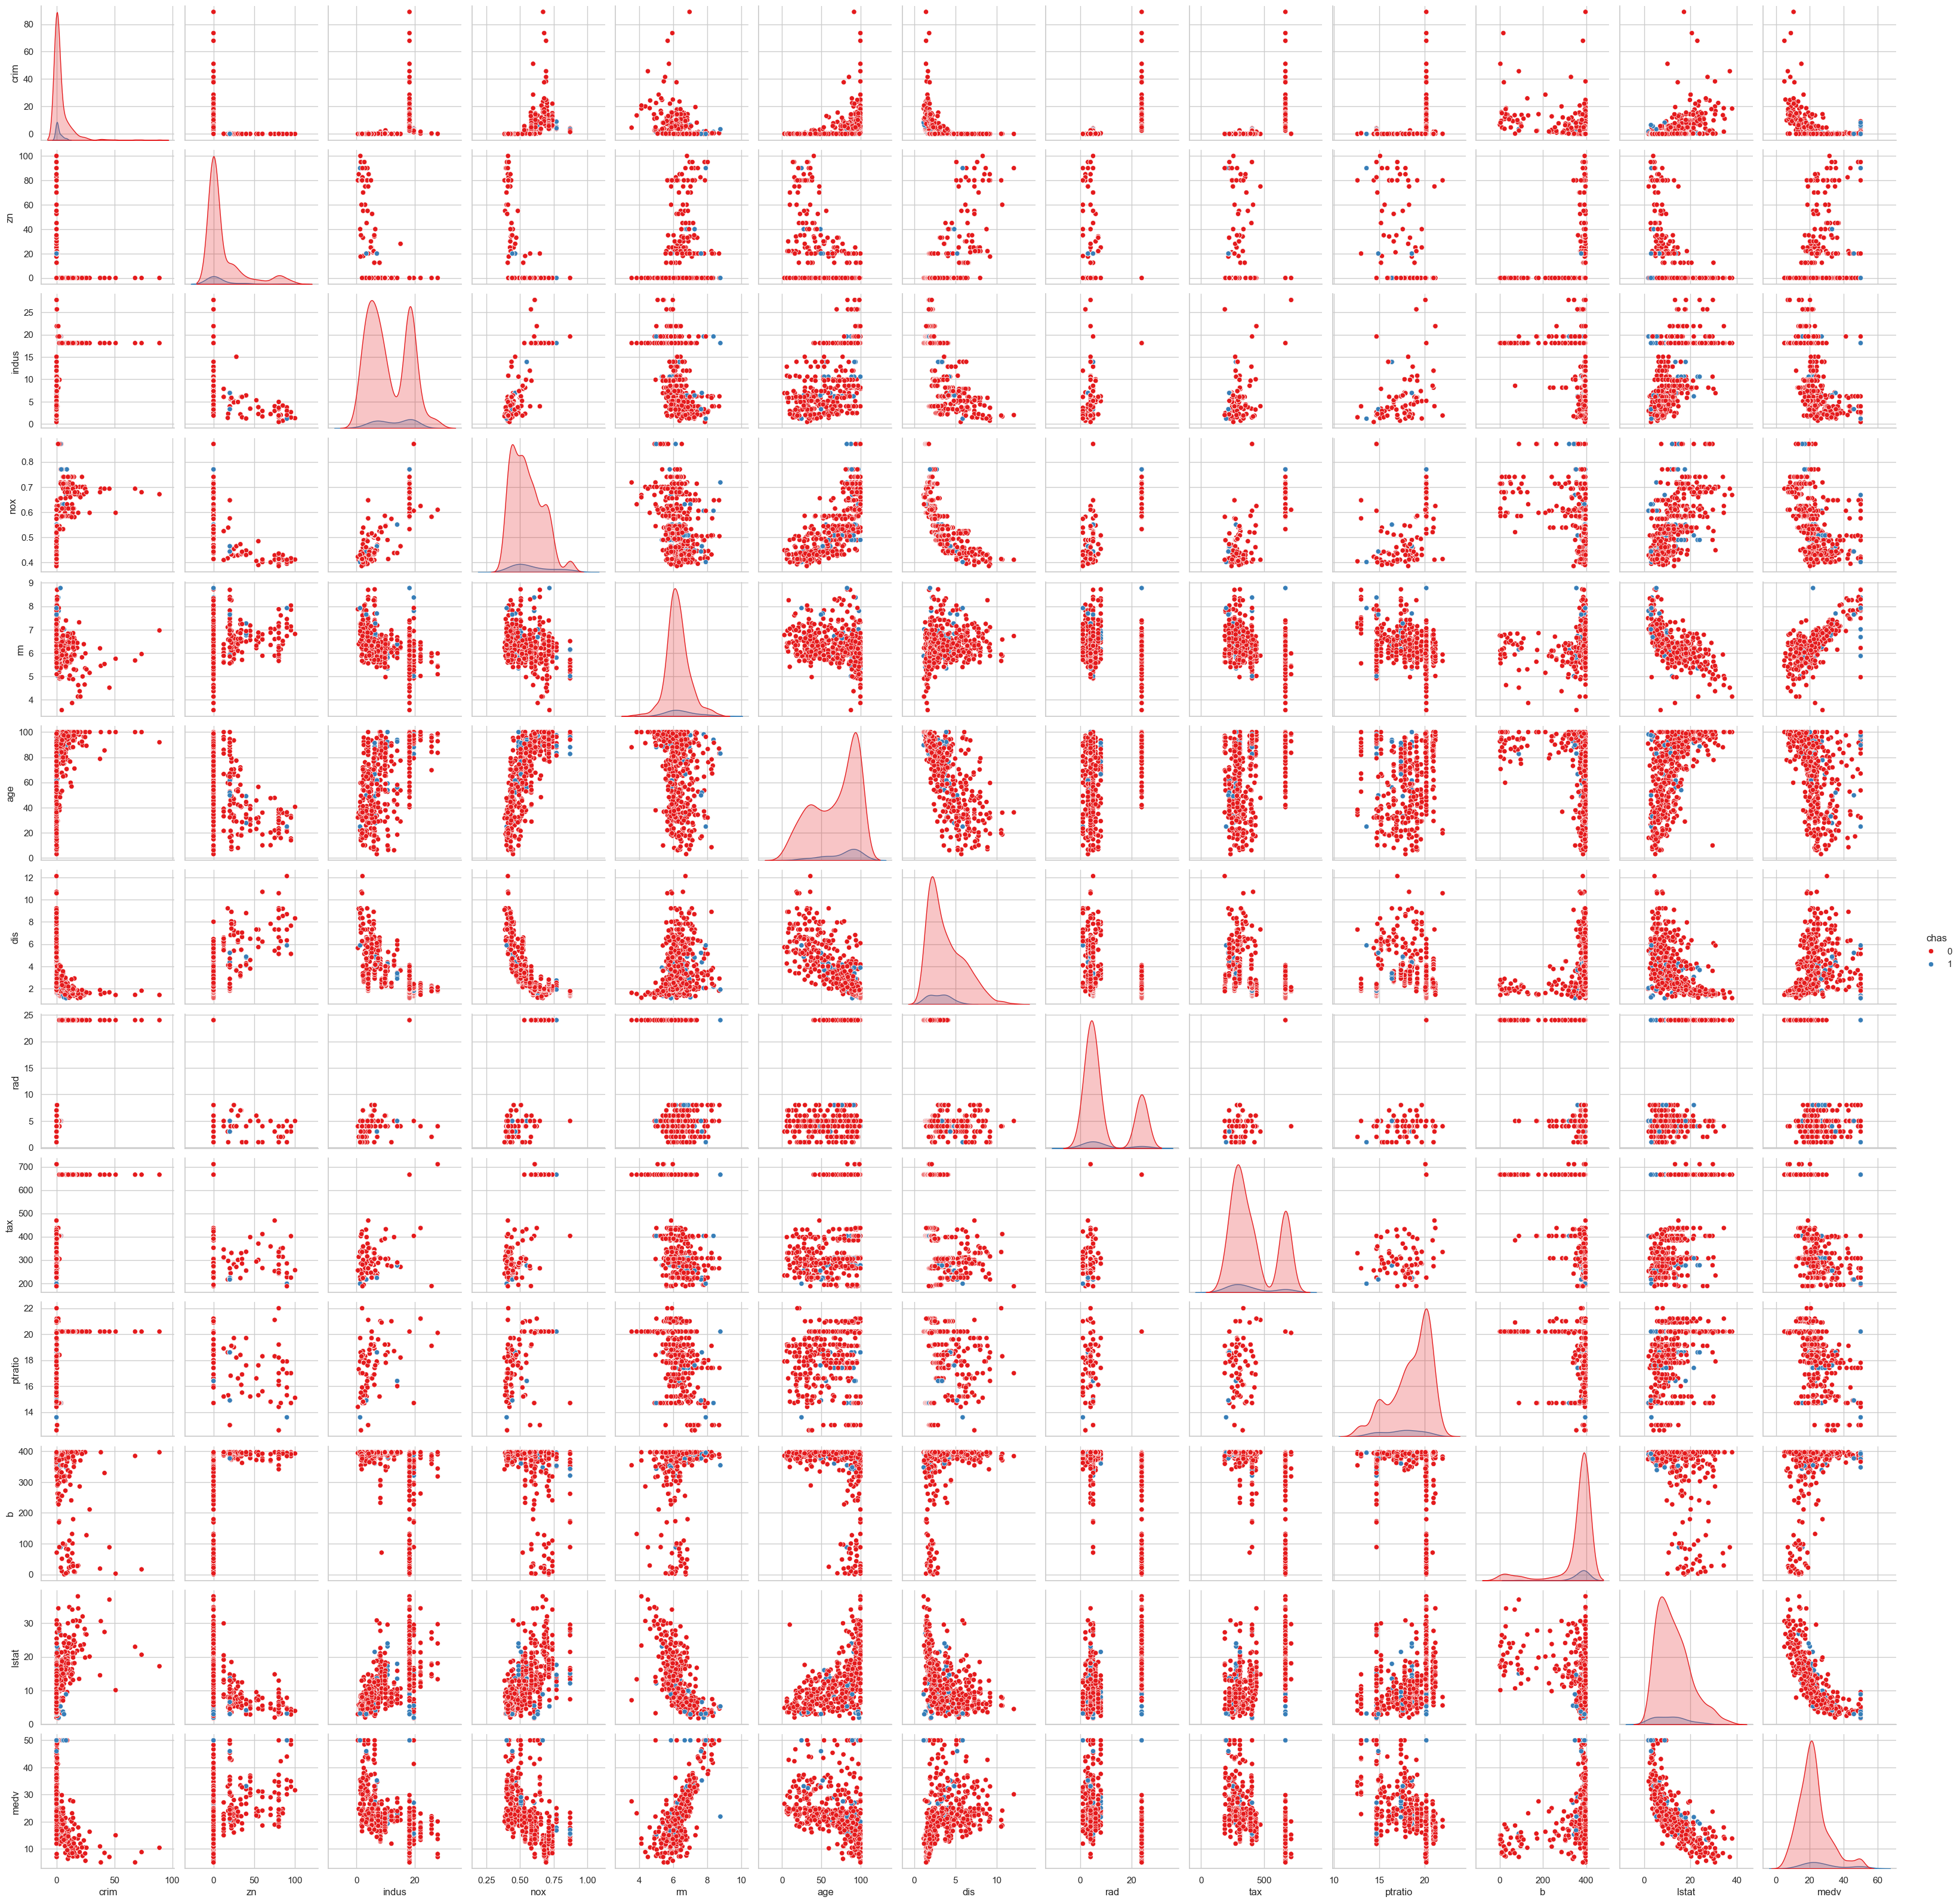

In [23]:
sns.pairplot(df, diag_kind='kde', markers='o', hue='chas', palette='Set1')

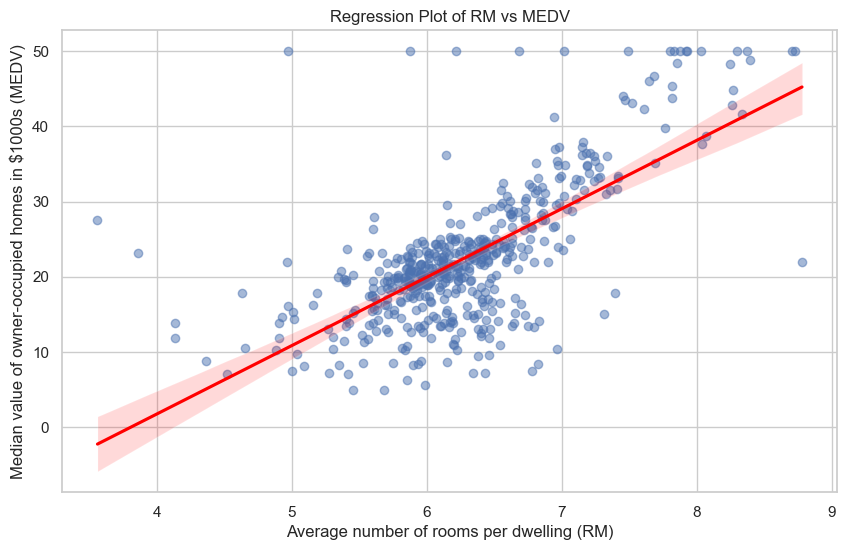

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rm', y='medv', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot of RM vs MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()


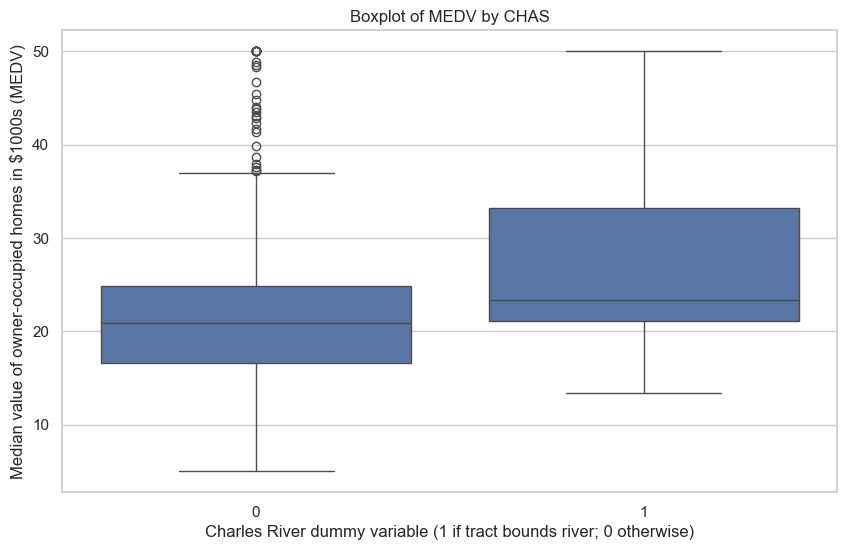

In [26]:
# Visualizing the categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='chas', y='medv', data=df)
plt.title('Boxplot of MEDV by CHAS')
plt.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()

In [27]:
X = df.drop('medv', axis=1)
y = df['medv']

In [32]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


## Model Training

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
print(model.coef_)

[-1.14691411  0.83432605  0.33940694  0.79163612 -1.784727    2.84783949
 -0.30429306 -2.91562521  2.11140045 -1.46519951 -1.9696347   1.07567771
 -3.90310727]


In [43]:
model.intercept_

22.50945471291038

In [44]:
# On which parameters does the model has been trained?
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
y_pred = model.predict(X_test)

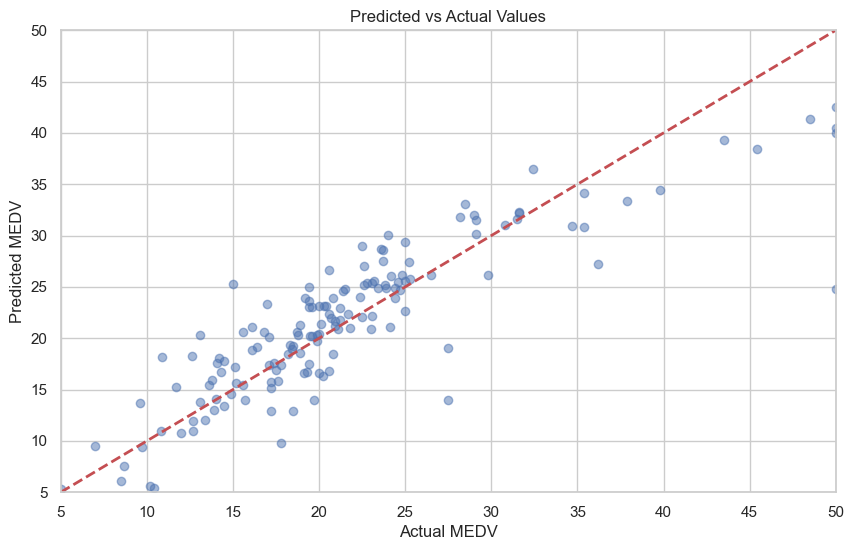

In [45]:
## Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.show()

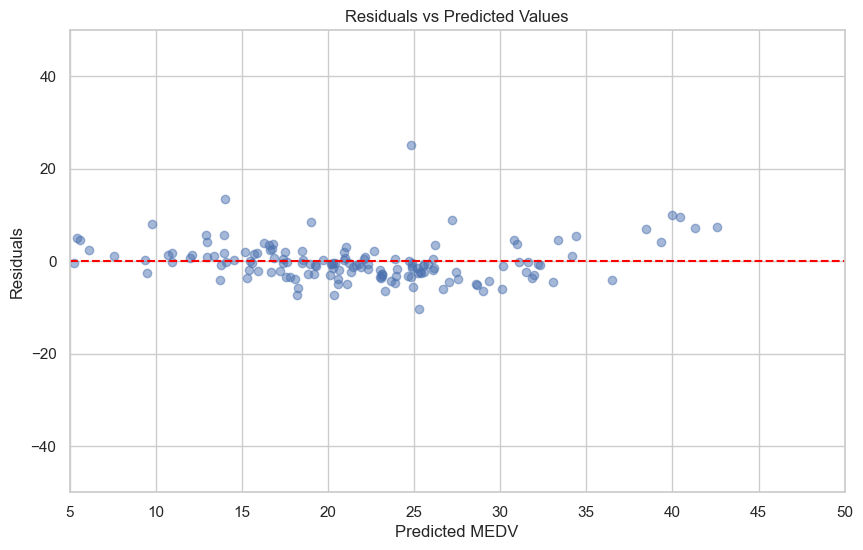

In [46]:
# Plot the residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.xlim(y.min(), y.max())
plt.ylim(-50, 50)
plt.show()

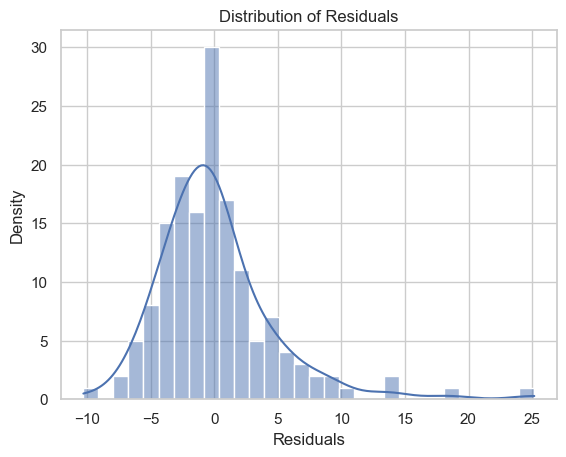

In [48]:
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 21.52
Root Mean Squared Error: 4.64
Mean Absolute Error: 3.16
R-squared: 0.71


## New data Prediction

In [73]:
newdata = df.iloc[1,:-1].values

In [75]:
newdata = newdata.reshape(1, -1)

In [77]:
newdata_scaled = scaler.fit_transform(newdata)

In [78]:
model.predict(newdata_scaled)

array([22.50945471])

In [81]:
df.iloc[1, -1]

21.6

## Pickling the model file for deployment

In [82]:
import pickle
pickle.dump(model, open('boston_housing_model.pkl', 'wb'))

In [83]:
pickle_model = pickle.load(open('boston_housing_model.pkl', 'rb'))


In [84]:
pickle_model.predict(newdata_scaled)

array([22.50945471])